# Import software libraries and load the dataset #

In [13]:
import sys                             # Read system parameters.
import numpy as np                     # Work with multi-dimensional arrays and matrices.
import pandas as pd                    # Manipulate and analyze data.
import matplotlib as mpl               # Create 2D charts.
import matplotlib.pyplot as plt
import seaborn as sb                   # Perform data visualization.
import sklearn                         # Perform data mining and analysis.
from sklearn import datasets
import seaborn as sns
# Summarize software libraries used.
print('Libraries used in this project:')
print('- Python {}'.format(sys.version))
print('- NumPy {}'.format(np.__version__))
print('- pandas {}'.format(pd.__version__))
print('- Matplotlib {}'.format(mpl.__version__))
print('- scikit-learn {}\n'.format(sklearn.__version__))

Libraries used in this project:
- Python 3.9.0 (tags/v3.9.0:9cf6752, Oct  5 2020, 15:34:40) [MSC v.1927 64 bit (AMD64)]
- NumPy 1.25.2
- pandas 2.1.2
- Matplotlib 3.8.1
- scikit-learn 1.3.2



# Get acquainted with the dataset #

1. Import the iris dataset.
2. Convert the dataset to a dataframe.
    - The rows has the data.
    - Do not forget the column names.
    - Also the target label.
3. Print the first ten rows.

In [10]:
ir = datasets.load_iris()
df = pd.DataFrame(ir.data, columns=ir.feature_names)
df["target"]=ir.target
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


# Examine a general summary of statistics

In [11]:
df.describe().round()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
count,150.0,150.0,150.0,150.0,150.0
mean,6.0,3.0,4.0,1.0,1.0
std,1.0,0.0,2.0,1.0,1.0
min,4.0,2.0,1.0,0.0,0.0
25%,5.0,3.0,2.0,0.0,0.0
50%,6.0,3.0,4.0,1.0,1.0
75%,6.0,3.0,5.0,2.0,2.0
max,8.0,4.0,7.0,2.0,2.0


# Identify outliers

C:\Users\HP\AppData\Local\Temp\ipykernel_3780\3174120424.py:14: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(labels)


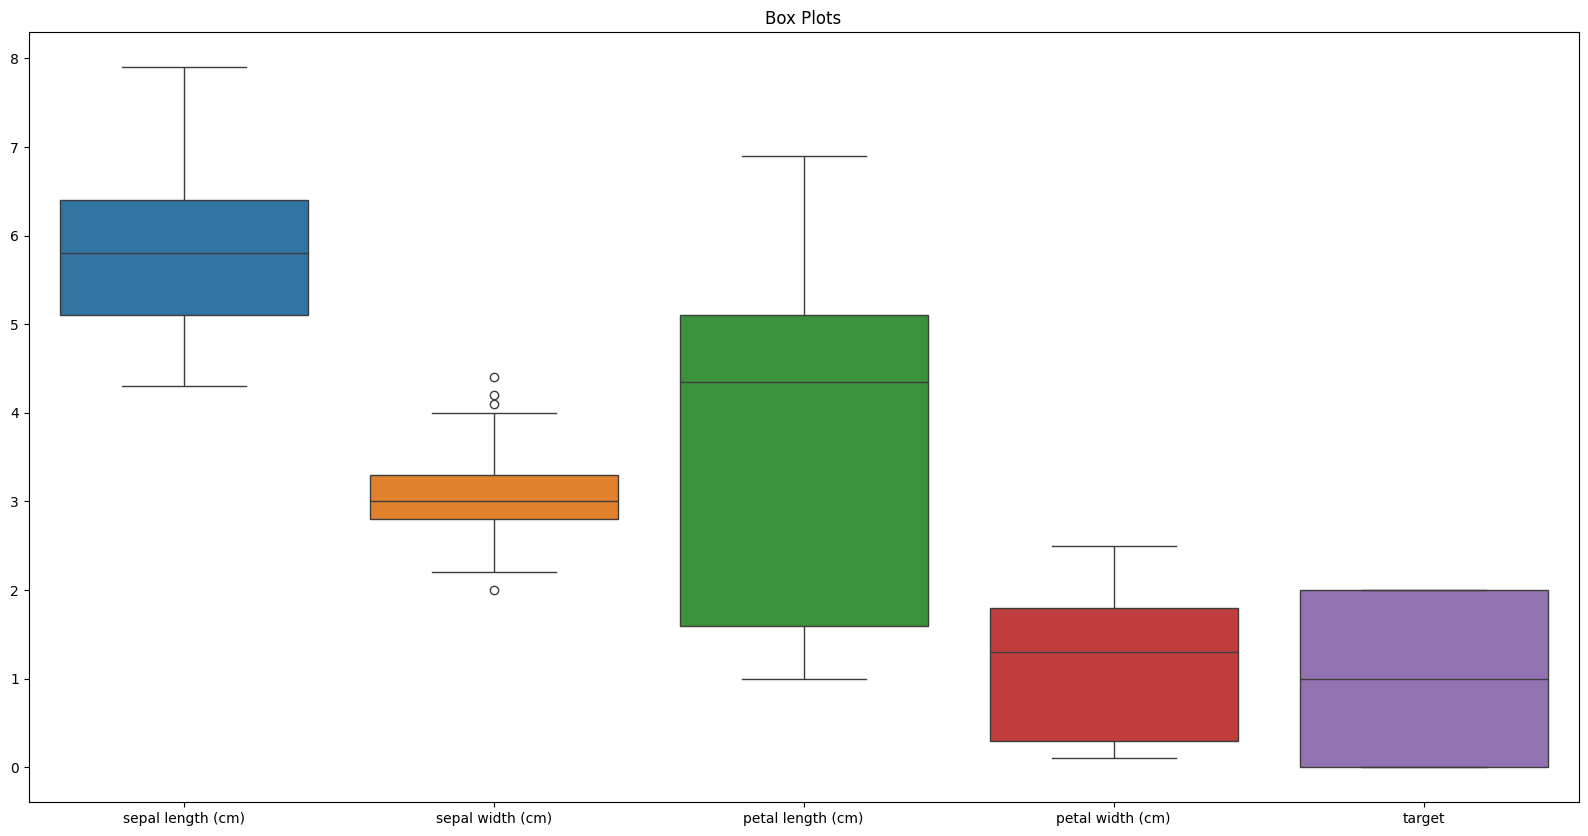

In [14]:
data = [
    df['sepal length (cm)'], df['sepal width (cm)'], df['petal length (cm)'],
    df['petal width (cm)'], df['target']
]

labels = [
     'sepal length (cm)', 'sepal width (cm)', 'petal length (cm)',
    'petal width (cm)', 'target'
]

fig, ax = plt.subplots(figsize=(20, 10))

sns.boxplot(data=data, ax=ax)
ax.set_xticklabels(labels)
ax.set_title('Box Plots')

plt.show();

# Reduce the dimensionality of the dataset

- We want just two classes of the target label.

In [15]:
df["target"].value_counts()

target
0    50
1    50
2    50
Name: count, dtype: int64

In [16]:
df = df[df["target"]!= 2]
df["target"].value_counts()

target
0    50
1    50
Name: count, dtype: int64

# Examine the separation between classes using a scatter plot

- Sepal length along x-axis, sepal width along y-axis.

<Axes: xlabel='sepal length (cm)', ylabel='sepal width (cm)'>

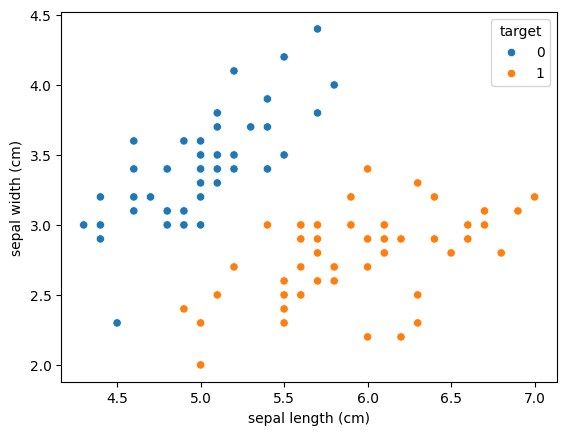

In [21]:
sns.scatterplot(df,x="sepal length (cm)",y="sepal width (cm)",hue="target")

# Plot a decision boundary for a given model

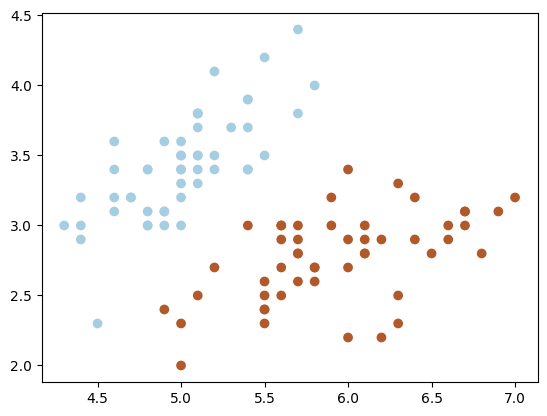

In [24]:

plt.scatter(df["sepal length (cm)"], df["sepal width (cm)"], c=df["target"], cmap=plt.cm.Paired)
plt.show();

# Train a basic logistic regression model and plot its decision boundary

In [91]:
from sklearn.model_selection import train_test_split
X= df.loc[:,'sepal length (cm)':'sepal width (cm)']
y = df.loc[:,["target"]]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [92]:
from sklearn.linear_model import LogisticRegression
logmodel = LogisticRegression()
logmodel

LogisticRegression()

In [93]:
logmodel.fit(X_train,y_train)

C:\Users\HP\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression()

In [94]:
from sklearn.metrics import accuracy_score
y_p=logmodel.predict(X_test)
print(f'The accuracy of the model : {accuracy_score(y_test, y_p)}')

The accuracy of the model : 1.0


In [95]:
print(logmodel.intercept_[0])
print(logmodel.coef_[0])

-7.079942415795202
[ 2.88868978 -2.72919824]


(1.5, 5.0)

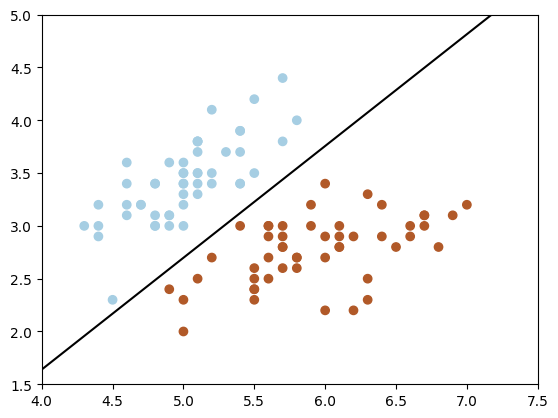

In [96]:
plt.scatter(df["sepal length (cm)"], df["sepal width (cm)"], c=df["target"], cmap=plt.cm.Paired)
w = logmodel.coef_[0]
a = -w[0] / w[1]
xx = np.linspace(-5, 10)
yy = a * xx - (logmodel.intercept_[0]) / w[1]
plt.plot(xx, yy, 'k-')
plt.xlim([4,7.5])
plt.ylim([1.5,5])


# Train an SVM model and plot its decision boundary plus margins

- Make the C parameter = 100.

In [83]:
from sklearn import svm

clf=svm.SVC(kernel='linear', C=100)

In [84]:
clf.fit(X_train, y_train)

C:\Users\HP\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVC(C=100, kernel='linear')

In [85]:
print(clf.score(X_test, y_test))

1.0


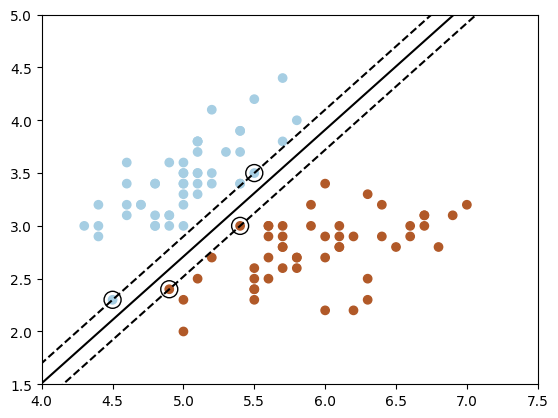

In [106]:
plt.scatter(df["sepal length (cm)"], df["sepal width (cm)"], c=df["target"], cmap=plt.cm.Paired)
w = clf.coef_[0]
a = -w[0] / w[1]
xx = np.linspace(-5, 10)
yy = a * xx - (clf.intercept_[0]) / w[1]
plt.plot(xx, yy, 'k-')
plt.xlim([4,7.5])
plt.ylim([1.5,5])
plt.gca().scatter(
    clf.support_vectors_[:, 0],
    clf.support_vectors_[:, 1],
    s=150,
    linewidth=1,
    facecolors="none",
    edgecolors="k"
);
margin = 1 / np.sqrt(np.sum(clf.coef_**2))
yy_down = yy - np.sqrt(1 + a**2) * margin
yy_up = yy + np.sqrt(1 + a**2) * margin
plt.plot(xx, yy_down, "k--")
plt.plot(xx, yy_up, "k--")

# Reduce the regularization penalty to soften the margin

- Make the C parameter = 0.1

In [108]:
clff=svm.SVC(kernel='linear', C=0.1)

In [109]:
clff.fit(X_train, y_train)

C:\Users\HP\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVC(C=0.1, kernel='linear')

In [111]:
print(clff.score(X_test, y_test))

1.0


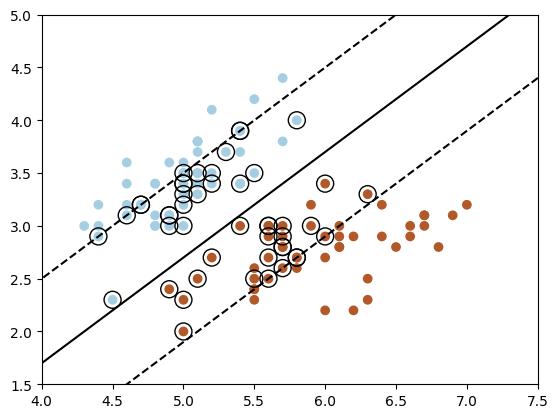

In [112]:
plt.scatter(df["sepal length (cm)"], df["sepal width (cm)"], c=df["target"], cmap=plt.cm.Paired)
w = clff.coef_[0]
a = -w[0] / w[1]
xx = np.linspace(-5, 10)
yy = a * xx - (clff.intercept_[0]) / w[1]
plt.plot(xx, yy, 'k-')
plt.xlim([4,7.5])
plt.ylim([1.5,5])
plt.gca().scatter(
    clff.support_vectors_[:, 0],
    clff.support_vectors_[:, 1],
    s=150,
    linewidth=1,
    facecolors="none",
    edgecolors="k"
);
margin = 1 / np.sqrt(np.sum(clff.coef_**2))
yy_down = yy - np.sqrt(1 + a**2) * margin
yy_up = yy + np.sqrt(1 + a**2) * margin
plt.plot(xx, yy_down, "k--")
plt.plot(xx, yy_up, "k--")

# Split the datasets

In [113]:
from sklearn.model_selection import train_test_split
X= df.loc[:,:'petal width (cm)']
y = df.loc[:,["target"]]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

# Evaluate an SVM model using a holdout test set

In [114]:
eva=svm.SVC()
eva.fit(X_train, y_train)
pred=eva.predict(X_test)

C:\Users\HP\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [115]:
from sklearn.metrics import \
     accuracy_score, precision_score, recall_score, f1_score,roc_auc_score

In [116]:
print('accuracy: ', accuracy_score(y_test,pred))
print('Recall: ', recall_score(y_test,pred))
print('Precision: ', precision_score(y_test,pred))
print('F1 score: ', f1_score(y_test,pred))
print('AUC-ROC: ', roc_auc_score(y_test,pred))

accuracy:  1.0
Recall:  1.0
Precision:  1.0
F1 score:  1.0
AUC-ROC:  1.0
